# PROJECT DESCRIPTION

Description About Data
In the data, we have the following columns to work with :

Qualification: Qualification and degrees held by the doctor
Experience: Experience of the doctor (number of years)
Rating: Rating given by patients
Profile: Type of the doctor
Miscellaeous_Info: Extra information about the doctor
Place: Area and the city where the doctor is located
Fees: Fees charged by the doctor(Target)

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASETS

In [11]:
df_train = pd.read_excel (r'C:\Users\No\OneDrive\Desktop\DATATRAINED\Doctor_fee_consultation\Final_Train.xlsx')
print (df_train)

                       Qualification           Experience Rating  \
0              BHMS, MD - Homeopathy  24 years experience   100%   
1       BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2     MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3                BSc - Zoology, BAMS  12 years experience    NaN   
4                               BAMS  20 years experience   100%   
...                              ...                  ...    ...   
5956                  MBBS, MS - ENT  19 years experience    98%   
5957                            MBBS  33 years experience    NaN   
5958                            MBBS  41 years experience    97%   
5959     MBBS, MD - General Medicine  15 years experience    90%   
5960         BDS, MDS - Orthodontics  17 years experience   100%   

                              Place           Profile  \
0               Kakkanad, Ernakulam         Homeopath   
1             Whitefield, Bangalore          Ayurveda   
2        Mat

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [14]:
df_test = pd.read_excel (r'C:\Users\No\OneDrive\Desktop\DATATRAINED\Doctor_fee_consultation\Final_Test.xlsx')
print (df_test)

                                        Qualification           Experience  \
0                                                MBBS  35 years experience   
1          MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                          MBBS, DDVL  40 years experience   
3                                                BAMS   0 years experience   
4     BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   
...                                               ...                  ...   
1982                         BAMS, Doctor of Medicine  10 years experience   
1983   MD - Dermatology , Venereology & Leprosy, MBBS   4 years experience   
1984         MBBS, MD / MS - Obstetrics & Gynaecology   9 years experience   
1985                                              BDS  12 years experience   
1986   MBBS, MD - Dermatology , Venereology & Leprosy   8 years experience   

     Rating                        Place           Profile  \
0

In [15]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [16]:
#checking data info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [18]:
#checking null values
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [19]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [21]:
#extracting numeric values fron the experience column
df_train['Experience'] = df_train['Experience'].str.split().str[0]
df_train['Experience'] = df_train['Experience'].astype(int)

In [22]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [23]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [24]:
#filling the missing values in column a with "Not-Known" and separating locality and city
df_train.Place.fillna('Not-Known,Not-Known',inplace=True)

df_train['locality'] = df_train['Place'].str.split(",").str[0]
df_train['city'] = df_train['Place'].str.split(",").str[1]

#Now we can drop the place variable
df_train.drop('Place',axis=1,inplace=True)

In [25]:
df_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


As there are 50% values missing in rating column so we will fill the na values

In [26]:
df_train['Rating'].fillna('-99%',inplace=True)

# extract value of rating to avoid '%' and convert to numeric
df_train['Rating'] = df_train['Rating'].str.slice(stop=-1).astype(int)

Grouping ratings into various groups

In [27]:
print("0-9% ",len(df_train[(df_train['Rating']>0) & (df_train['Rating']<10)]))
print("10-19% ",len(df_train[(df_train['Rating']>=10) & (df_train['Rating']<20)]))
print("20-29% ",len(df_train[(df_train['Rating']>=20) & (df_train['Rating']<30)]))
print("30-39% ",len(df_train[(df_train['Rating']>=30) & (df_train['Rating']<40)]))
print("And so-on..")

0-9%  1
10-19%  0
20-29%  0
30-39%  3
And so-on..


In [28]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_train['Rating'] = pd.cut(df_train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [29]:
df_train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [30]:
df_train['Qualification_count'] = df_train['Qualification'].apply(lambda x: len(x.split(",")))

df_train['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [31]:
df_train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [34]:
# Extract relevant qualification
# DICT of qualification with there counts
df_train["Qualification"]=df_train["Qualification"].str.split(",")
Qualification ={}
for x in df_train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
print(df_train['Qualification'])

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object


In [35]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [36]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df_train[qual] = 0

for x,y in zip(df_train['Qualification'].values, np.array([i for i in range(len(df_train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_train[c][y] = 1

In [37]:
# Now we can drop the extra quali which we added 
df_train.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [38]:
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [39]:
# CITY COLUMN
df_train['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Not-Known',
       ' Sector 5', nan], dtype=object)

In [40]:
# remove the extra spaces before the city
import re
df_train['city'] = df_train['city'].apply(lambda x: re.sub(' +','',str(x)))

In [41]:
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [42]:
df_train['city'] = np.where(df_train['city']=="Sector5","Delhi", df_train['city'])

#nan
df_train['city'].loc[3980] = "Unknown"
df_train['locality'].loc[3980] = "Unknown"

In [43]:
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [44]:
df_train.groupby('city')['locality'].nunique()

city
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Not-Known               1
Thiruvananthapuram     48
Unknown                 1
Name: locality, dtype: int64

In [45]:
import csv

In [46]:
df_train.to_csv('data_correct.csv',index=False)

In [47]:
df_train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


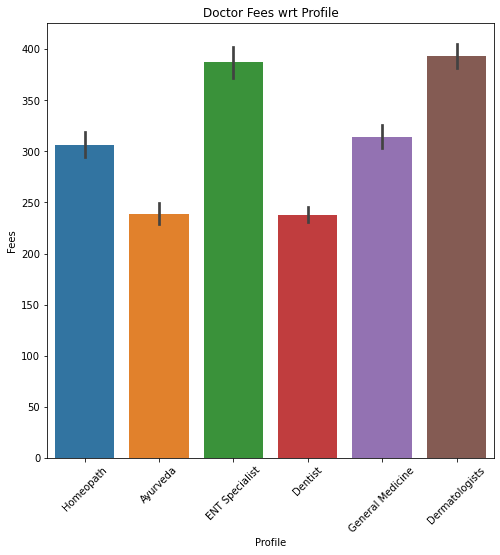

In [48]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=df_train)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

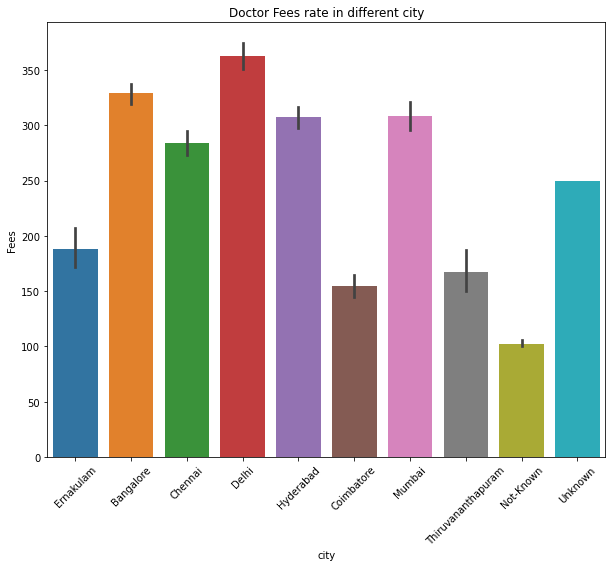

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=df_train)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

Observations

As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city so, as usual the doctor consultation fees in these metripolean cities are very high as compared to Tier 2 and Tier 3 city.
Doctor Fess with having profile as ENT Specialist and Dermatologist is very high then Homeopath and Genral medicine are at same level.

In [50]:
df_train = pd.get_dummies(df_train,columns=['city','Profile'], prefix=['city','Profile'])

In [51]:
df_train.head()

,Experience,Rating,Miscellaneous_Info,Fees,locality,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Not-Known,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
df_train.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

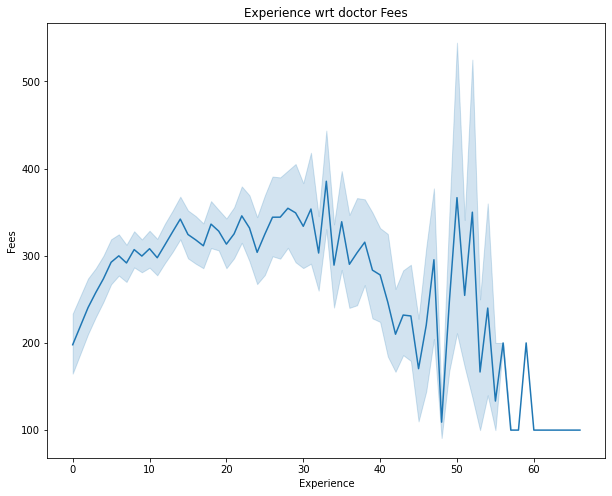

In [53]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df_train)
ax.set_title("Experience wrt doctor Fees")
plt.show()

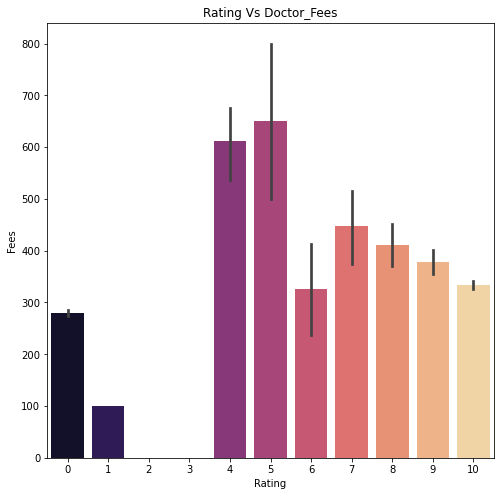

In [54]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=df_train,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

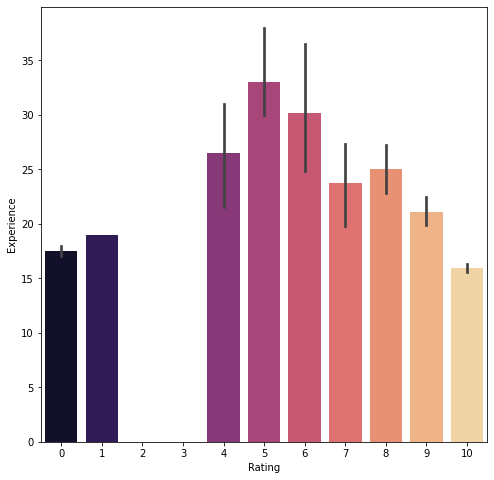

In [55]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=df_train,palette='magma')
plt.show()

OBSERVATIONS

the Rating is interesting column, we have grouped the rating in 10 bins, eg: bin5 will be rating of 40-49%.
As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.
The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years.

In [56]:
df_train.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city_Bangalore,city_Chennai,city_Coimbatore,city_Delhi,city_Ernakulam,city_Hyderabad,city_Mumbai,city_Not-Known,city_Thiruvananthapuram,city_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# TEST_DATASET

In [57]:
# EXPERIENCE COLUMN
df_test['Experience'] = df_test['Experience'].str.split().str[0]
df_test['Experience'] = df_test['Experience'].astype(int)

#Place column (Extract city and locality in diff column)
df_test['Place'].fillna('Unknown,Unknown',inplace=True)
df_test['locality'] = df_test['Place'].str.split(",").str[0]
df_test['city'] = df_test['Place'].str.split(",").str[1]
#drop place column
df_test.drop('Place',axis=1,inplace=True)

#Rating column
df_test['Rating'].fillna('-99%',inplace=True)
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)
# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
df_test['Rating'] = pd.cut(df_test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [60]:
# QUALIFICATION COLUMN
# dict of qualification with counts
# HERE the top 10 Qual of train and test col should be same so I am imputing the train col to test col
data =pd.read_excel (r'C:\Users\No\OneDrive\Desktop\DATATRAINED\Doctor_fee_consultation\Final_Test.xlsx')
data['Qualification'] = data['Qualification'].str.split(",")
Qualification = {}
for x in data['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1
            
# finding out the top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

#encode the top 10 qualification in test dataset
for title in final_qual:
    df_test[title] = 0

for x,y in zip(df_test['Qualification'].values, np.array([i for i in range(len(df_test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df_test[c][y] = 1
            
#drop Qualification after getting top 10 qual.
df_test.drop('Qualification',axis=1,inplace=True)


#city column
df_test['city'] = df_test['city'].apply(lambda x: re.sub(' +','',x))

#encode city and profile
df_test = pd.get_dummies(df_test, columns=['city','Profile'], prefix=['city','Profile'])

#drop Miscellaneous_Info and locality
df_test.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

SPLITTING DATASET

In [61]:
x = df_train.drop('Fees',axis=1)
y = df_train['Fees']

In [62]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

In [63]:
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# BEST RANDOM STATE

In [69]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    RMS=r2_score(y_test,predlr)
    if RMS>maxAccu:
        maxAccu=RMS
        maxRS=i
print("Best R2 Score is: ",maxAccu,"on Random_state: ",maxRS)

Best R2 Score is:  0.21936203395033238 on Random_state:  267


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=267)

In [71]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [72]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [73]:
# Training and testing
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7764991854870583
SVR() 0.7754261204805624
DecisionTreeRegressor() 0.6964448280241659
RandomForestRegressor() 0.7759458419966412


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [75]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])

#gridsearch = GridSearchCV(svm_reg, param_grid=parameters, cv=5, scoring=scorer verbose=1, n_jobs=-1)
svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [77]:
svm_random.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [78]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.7953051991381266
best_params:
 {'kernel': 'linear', 'gamma': 'scale', 'C': 10}


In [79]:
# predict the test data from it and see the result
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.8157479849788315


In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [81]:
# try hyperparameter tuning

#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5]
#max_features
max_features=['sqrt','auto']

# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5], 'max_features': ['sqrt', 'auto']}


In [82]:
rf_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=100, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [83]:
print("best_params:\n",rf_random.best_params_)
print("\nbest_score:",rf_random.best_score_)

best_params:
 {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 12}

best_score: 0.7875758018995677


In [84]:
import joblib
joblib.dump(svm_random,"Baseball_Case_Study_Final_Result.pkl")

['Baseball_Case_Study_Final_Result.pkl']